In [1]:
%matplotlib inline
from IPython import display
import os
import io
import itertools
import collections
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import importlib


import rtmtools.lblrtm.aerutils as aerutils
importlib.reload(aerutils)
import rtmtools.clirad.sw.wrangle as cliradwrangle
importlib.reload(cliradwrangle)
import rtmtools.rrtmg.lw.wrangle as rrtmgwrangle
importlib.reload(rrtmgwrangle)

import climatools.offline_scripts.intermodel as scripts_intermodel
importlib.reload(scripts_intermodel)


<module 'climatools.offline_scripts.intermodel' from '/nuwa_cluster/home/jackyu/climatools/climatools/offline_scripts/intermodel.py'>

In [2]:
name_molecule = 'H2O_CO2' #r'$H_{2}O$'

In [3]:
#### Load CRD results

In [4]:
# Get lbl line-by-line results
pathout_crd = os.path.join('/nuwa_cluster/home/jackyu',
                           'radiation/crd/LW/examples', 
                           'lbl_H2008_{name_molecule}_cut25'\
                           .format(name_molecule=name_molecule),
                           'OUTPUT_RADSUM')

#pathout_crd = '/nuwa_cluster/home/jackyu/radiation/crd/LW/examples/lbl_H2008_h2O_cut25/OUTPUT_RADSUM'

pnl_crd = aerutils.OUTPUT_RADSUM_to_pandasPanel(readfrom=pathout_crd, 
                                                cooling_rate=True, 
                                                signed_fluxes=True)

print(pathout_crd)

/nuwa_cluster/home/jackyu/radiation/crd/LW/examples/lbl_H2008_H2O_CO2_cut25/OUTPUT_RADSUM


In [6]:
# H1996 cutoff = 10 cm-1
pathout_crd1 = os.path.join('/nuwa_cluster/home/jackyu',
                            'radiation/crd/LW/examples',
                            'lbl_H1996_{name_molecule}_cut10'\
                            .format(name_molecule=name_molecule),
                            'OUTPUT_RADSUM')

#pnl_crd1 = aerutils.OUTPUT_RADSUM_to_pandasPanel(readfrom=pathout_crd1, 
#                                                 cooling_rate=True, 
#                                                 signed_fluxes=True)

#print(pathout_crd1)

In [7]:
#### Load CLIRAD results

In [13]:
# Read OUTPUT_CLIRAD.dat
pathout_clirad = os.path.join('/nuwa_cluster/home/jackyu',
                              'radiation/clirad/LW/examples',
                              'mls75_{name_molecule}_H2012'\
                              .format(name_molecule=name_molecule),
                              'OUTPUT_CLIRAD.dat')

pnl_clirad = cliradwrangle.\
             OUTPUT_CLIRAD_to_PandasPanel(readfrom=pathout_clirad,
                                          cooling_rate=True, 
                                          signed_fluxes=True)

In [14]:
pathout_clirad_96 = os.path.join('/nuwa_cluster/home/jackyu',
                                 'radiation/clirad/LW/examples',
                                 'mls75_{name_molecule}'\
                                 .format(name_molecule=name_molecule),
                                 'OUTPUT_CLIRAD.dat')

pnl_clirad_96 = cliradwrangle.\
                OUTPUT_CLIRAD_to_PandasPanel(readfrom=pathout_clirad_96, 
                                             cooling_rate=True,
                                             signed_fluxes=True)

In [10]:
#### Load LBLRTM results

In [16]:
# Get AER line-by-line results
pathout_lblrtm = os.path.join('/nuwa_cluster/home/jackyu',
                              'line_by_line/aerlbl_v12.2_package',
                              'runs/LW/run_mls70pro_{name_molecule}'\
                              .format(name_molecule=name_molecule),
                              'OUTPUT_RADSUM')

pnl_lblrtm = aerutils.\
             OUTPUT_RADSUM_to_pandasPanel(readfrom=pathout_lblrtm, 
                                          signed_fluxes=True, 
                                          cooling_rate=True)

In [12]:
#### Load RRTMG results

In [17]:
pathout_rrtmg = os.path.join('/nuwa_cluster/home/jackyu',
                             'radiation/rrtmg/LW/examples',
                             'mls70_{name_molecule}'\
                             .format(name_molecule=name_molecule),
                             'OUTPUT_RRTM')

pnl_rrtmg = rrtmgwrangle.\
            OUTPUT_RRTM_to_pandasPanel(readfrom=pathout_rrtmg,
                                       signed_fluxes=True,
                                       cooling_rate = True)

# Whole spectral range

CRD
       pressure     flux_up   flux_down    net_flux  cooling_rate
70     0.002417 -303.601460    0.000000 -303.601460      0.000000
30   299.800000 -314.294443   51.895706 -262.398737      2.364306
0   1013.000000 -423.662018  302.680387 -120.981632      1.334258

LBLRTM
     pressure     flux_up   flux_down    net_flux  cooling_rate
70     0.0024 -303.296753    0.000000 -303.296753      0.000000
30   299.8000 -314.274467   51.898980 -262.375487      2.224562
0   1013.0000 -423.532488  302.385141 -121.147347      1.316827

RRTMG
      pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -302.2284     0.0000 -302.2284       0.00000
30   299.70000 -313.3890    51.7261 -261.6629       2.18648
0   1013.00000 -423.5981   303.9900 -119.6081       1.36321

CLIRAD
       pressure     flux_up   flux_down    net_flux  cooling_rate
70     0.002417 -303.574586    0.013619 -303.560967     25.695853
30   299.800000 -314.366306   51.973508 -262.392798      2.325237
0   1013.000000

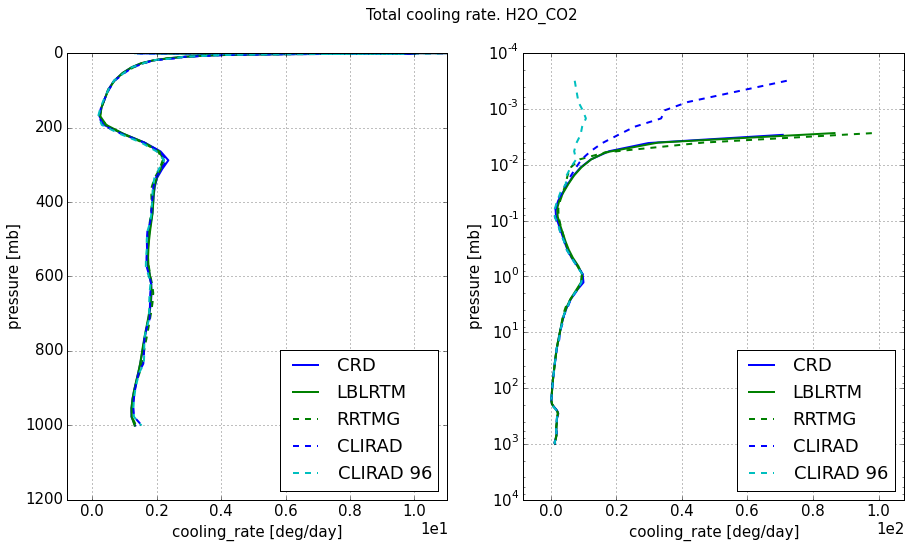

In [18]:
scripts_intermodel.lw_results_all_wavenumbers(
    infos_wavenumber=[('CRD', 'b', '-', pnl_crd),
                      ('LBLRTM', 'g', '-', pnl_lblrtm),
                      ('RRTMG', 'g', '--', pnl_rrtmg)],
    infos_spectralband=[('CLIRAD', 'b', '--', pnl_clirad),
                        ('CLIRAD 96', 'c', '--', pnl_clirad_96)],
    name_molecule=name_molecule)

In [19]:
html_download = ('<a href="./longwave_mls_{name_molecule}_total.xlsx"'
                 'download>longwave_mls_{name_molecule}_total.xlsx</a>')

display.HTML(html_download.format(name_molecule=name_molecule))

# In RRTMG's wavenumber bands

Flux tables and cooling rates in RRTMG spectral bands


RRTMG-LW. Spectral band 1. 10.0 ~ 350.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -36.3061     0.0000  -36.3061      -0.00000
30   299.70000 -38.7258    22.3568  -16.3690       1.36489
0   1013.00000 -54.5825    54.5778   -0.0047       0.00201

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -36.618217   0.000000 -36.618217      0.000000
30   299.800000 -38.842137  22.076937 -16.765200      1.442737
0   1013.000000 -54.573788  54.550693  -0.023095      0.008350

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -36.723340   0.000000 -36.723340      0.000000
30   299.8000 -38.985446  22.030607 -16.954839      1.334079
0   1013.0000 -54.581667  54.656241   0.074573      0.030404

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.312117   0.000000  0.312117     -0.000000
30 -0.100000  0.11

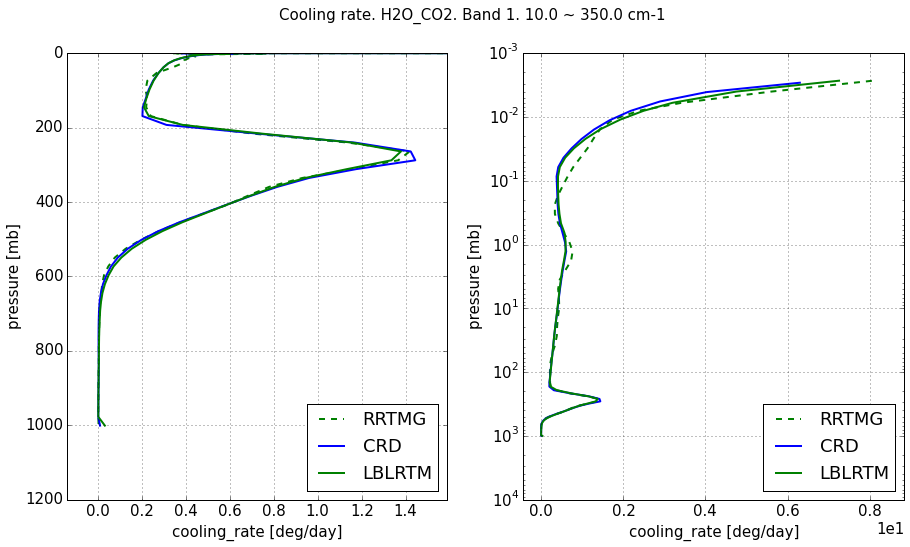


------------------------------------------------------------------------

RRTMG-LW. Spectral band 2. 350.0 ~ 500.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -44.3208     0.0000  -44.3208      -0.00000
30   299.70000 -45.1535     5.2688  -39.8847       0.46769
0   1013.00000 -60.9174    60.7515   -0.1659       0.05173

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -44.422872   0.000000 -44.422872      0.000000
30   299.800000 -45.270432   5.428132 -39.842299      0.522787
0   1013.000000 -60.916638  60.564831  -0.351806      0.065122

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -44.312136   0.000000 -44.312136      0.000000
30   299.8000 -45.185748   5.581636 -39.604112      0.506832
0   1013.0000 -60.917465  60.568614  -0.348851      0.074174

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.102072   0.000000  0.102072     -0.00000

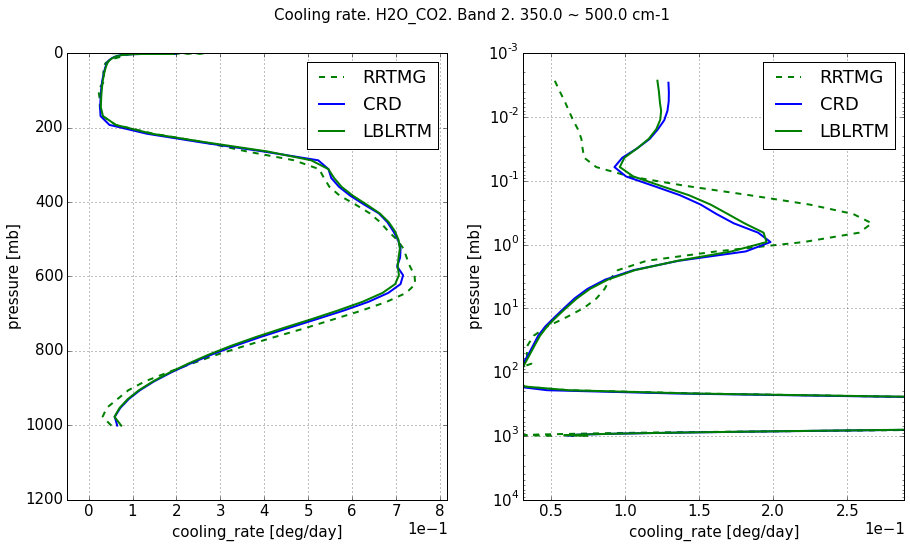


------------------------------------------------------------------------

RRTMG-LW. Spectral band 3. 500.0 ~ 630.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -41.7902     0.0000  -41.7902      -0.00000
30   299.70000 -43.5427     4.5282  -39.0145       0.15234
0   1013.00000 -58.6463    56.8235   -1.8228       0.25085

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -41.522534   0.000000 -41.522534      0.000000
30   299.800000 -43.395879   4.771101 -38.624778      0.181807
0   1013.000000 -58.652387  56.279587  -2.372799      0.236893

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -41.392641   0.000000 -41.392641      0.000000
30   299.8000 -43.300757   4.818022 -38.482735      0.180740
0   1013.0000 -58.646623  56.311634  -2.334990      0.236564

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003 -0.267666   0.000000 -0.267666     -0.00000

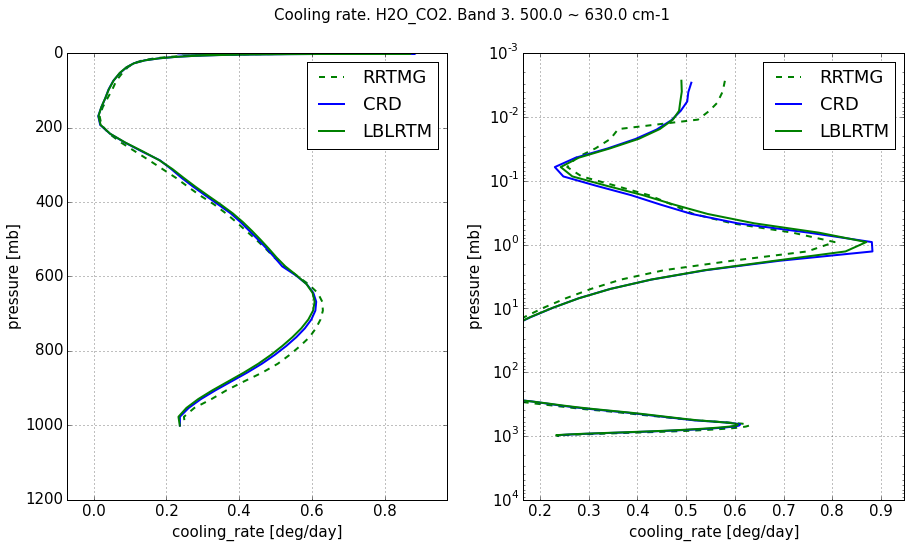


------------------------------------------------------------------------

RRTMG-LW. Spectral band 4. 630.0 ~ 700.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -11.9265     0.0000  -11.9265      -0.00000
30   299.70000 -14.5164    13.4961   -1.0203       0.04514
0   1013.00000 -30.8951    30.8533   -0.0418       0.01642

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -12.094158   0.000000 -12.094158      0.000000
30   299.800000 -14.485330  13.465687  -1.019643      0.045106
0   1013.000000 -30.901144  30.867650  -0.033493      0.011434

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -12.024655   0.000000 -12.024655      0.000000
30   299.8000 -14.560587  13.375094  -1.185493      0.043496
0   1013.0000 -30.895458  30.837079  -0.058379      0.012640

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.167658   0.000000  0.167658     -0.00000

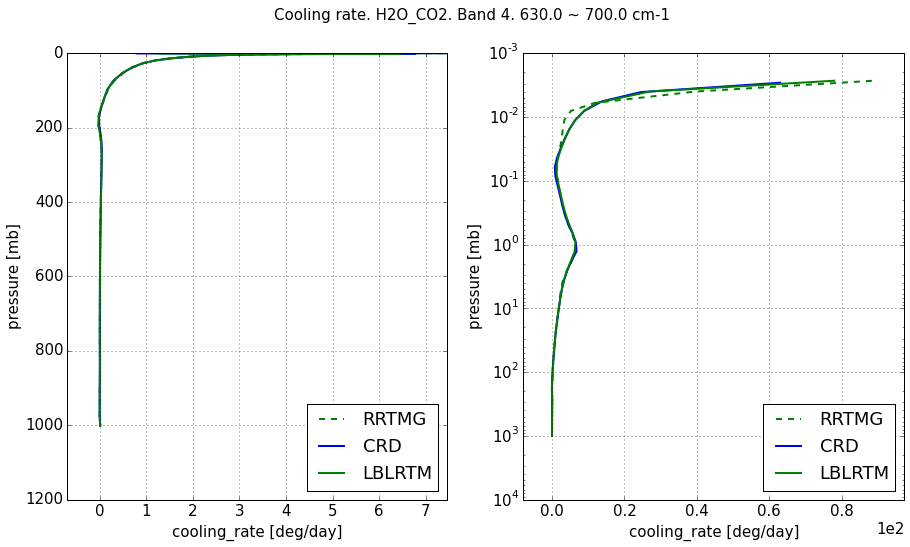


------------------------------------------------------------------------

RRTMG-LW. Spectral band 5. 700.0 ~ 820.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -36.2693     0.0000  -36.2693      -0.00000
30   299.70000 -38.3378     3.8285  -34.5093       0.05639
0   1013.00000 -48.8867    30.5033  -18.3834       0.31034

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -36.177944   0.000000 -36.177944      0.000000
30   299.800000 -38.257873   4.058243 -34.199629      0.062771
0   1013.000000 -48.899846  30.810699 -18.089147      0.292477

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -36.339553   0.000000 -36.339553      0.000000
30   299.8000 -38.432263   3.974650 -34.457613      0.058566
0   1013.0000 -48.886744  30.485752 -18.400992      0.292447

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003 -0.091356   0.000000 -0.091356     -0.00000

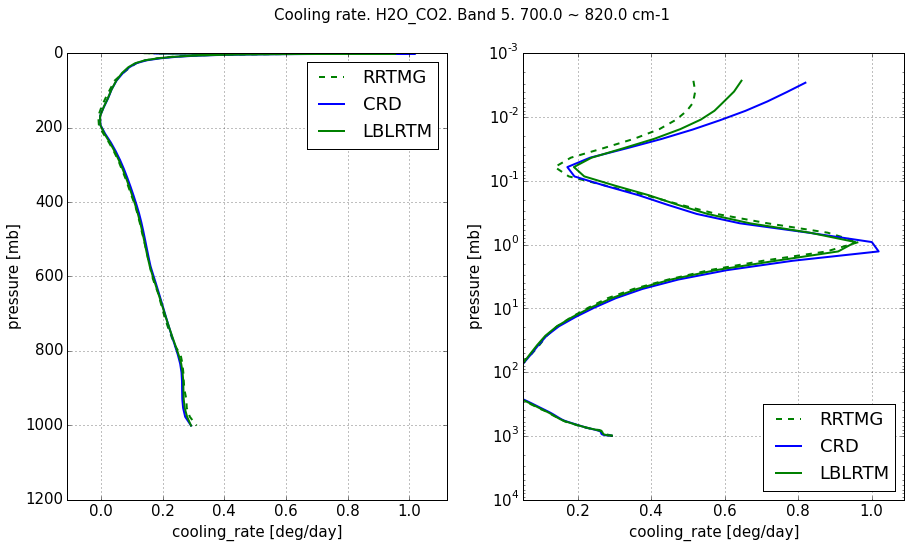


------------------------------------------------------------------------

RRTMG-LW. Spectral band 6. 820.0 ~ 980.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -52.7555     0.0000  -52.7555      -0.00000
30   299.70000 -52.8217     0.0256  -52.7961      -0.00159
0   1013.00000 -53.9607     6.8658  -47.0949       0.20026

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -52.786179   0.000000 -52.786179      0.000000
30   299.800000 -52.844195   0.027763 -52.816432     -0.001085
0   1013.000000 -53.981634   6.720210 -47.261424      0.191545

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -52.763595   0.000000 -52.763595      0.000000
30   299.8000 -52.821095   0.026556 -52.794539     -0.001115
0   1013.0000 -53.960338   6.657655 -47.302682      0.181595

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.030679   0.000000  0.030679     -0.00000

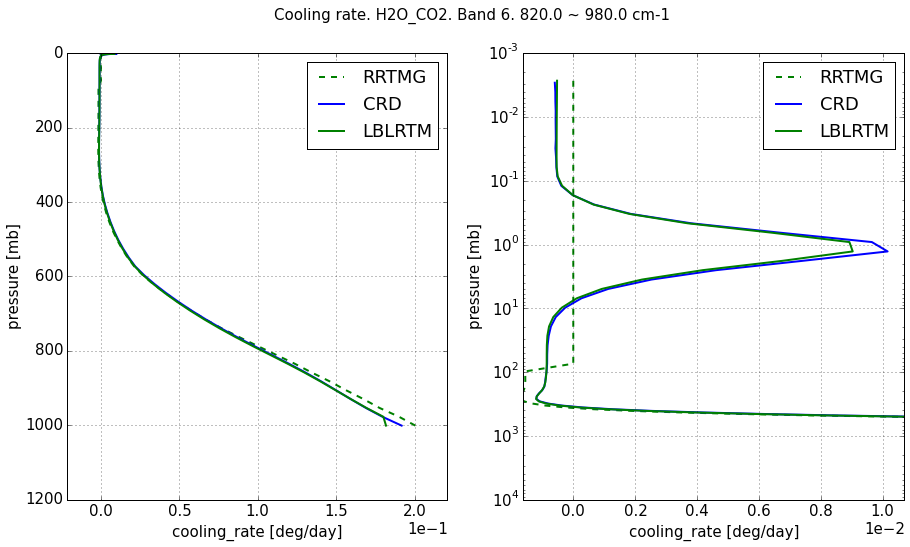


------------------------------------------------------------------------

RRTMG-LW. Spectral band 7. 980.0 ~ 1080.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -25.9080     0.0000  -25.9080      -0.00000
30   299.70000 -26.0154     0.0354  -25.9800      -0.00216
0   1013.00000 -26.6402     2.9315  -23.7087       0.08206

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -25.953566   0.000000 -25.953566      0.000000
30   299.800000 -26.020186   0.026289 -25.993897     -0.001618
0   1013.000000 -26.654056   2.973756 -23.680300      0.085840

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -25.943237   0.000000 -25.943237      0.000000
30   299.8000 -26.009637   0.025266 -25.984371     -0.001620
0   1013.0000 -26.640246   2.937060 -23.703185      0.081212

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.045566   0.000000  0.045566     -0.0000

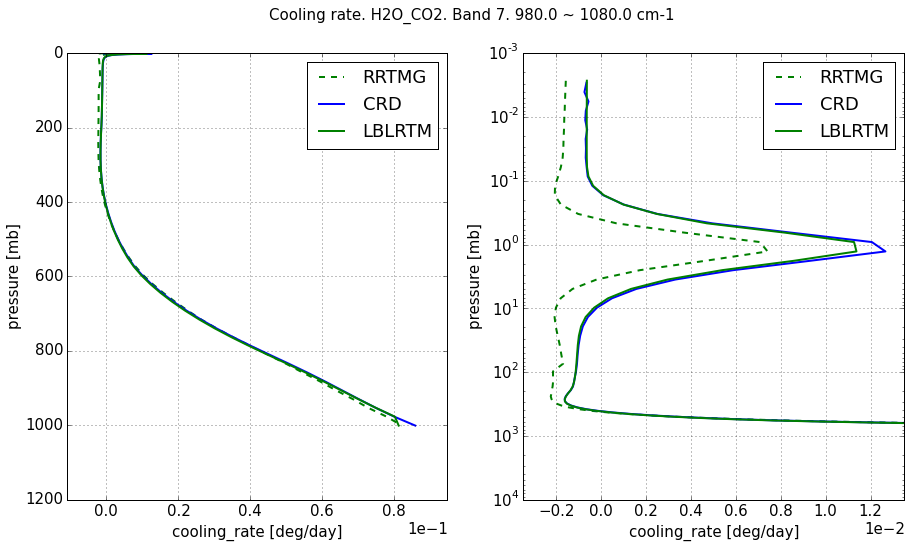


------------------------------------------------------------------------

RRTMG-LW. Spectral band 8. 1080.0 ~ 1180.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -20.4497     0.0000  -20.4497      -0.00000
30   299.70000 -20.4756     0.0114  -20.4642      -0.00058
0   1013.00000 -21.5225     4.7012  -16.8213       0.12514

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -20.484521   0.000000 -20.484521      0.000000
30   299.800000 -20.503118   0.011192 -20.491926     -0.000204
0   1013.000000 -21.535940   4.534923 -17.001017      0.118440

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -20.475800   0.000000 -20.475800      0.000000
30   299.8000 -20.494106   0.010743 -20.483362     -0.000221
0   1013.0000 -21.522739   4.515566 -17.007172      0.114826

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.034821   0.000000  0.034821     -0.000

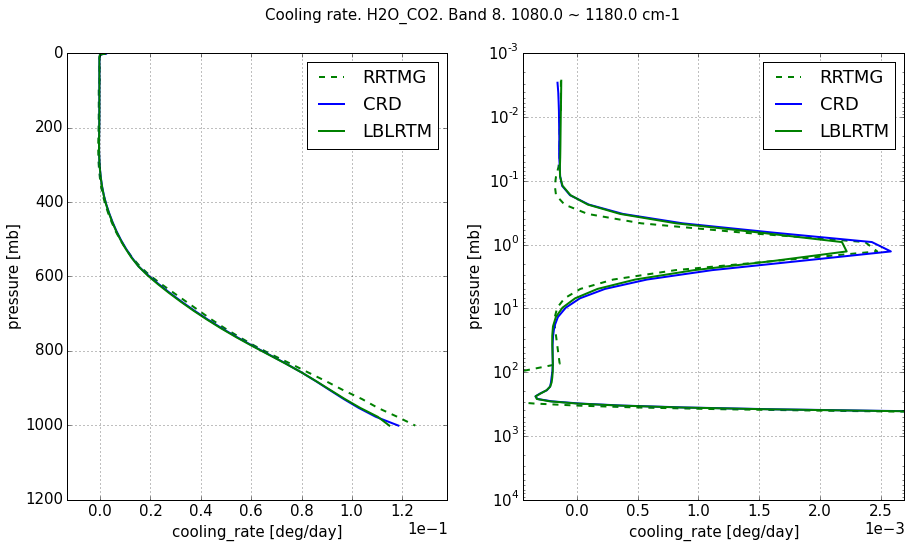


------------------------------------------------------------------------

RRTMG-LW. Spectral band 9. 1180.0 ~ 1390.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -22.0664     0.0000  -22.0664      -0.00000
30   299.70000 -22.3024     0.3088  -21.9936       0.01648
0   1013.00000 -31.2998    22.2084   -9.0914       0.25038

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -22.331858   0.000000 -22.331858      0.000000
30   299.800000 -22.502976   0.245861 -22.257115      0.013597
0   1013.000000 -31.323236  22.095176  -9.228060      0.246954

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -22.350054   0.000000 -22.350054      0.000000
30   299.8000 -22.522184   0.245395 -22.276789      0.012931
0   1013.0000 -31.299603  22.011875  -9.287728      0.247273

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.265458   0.000000  0.265458     -0.000

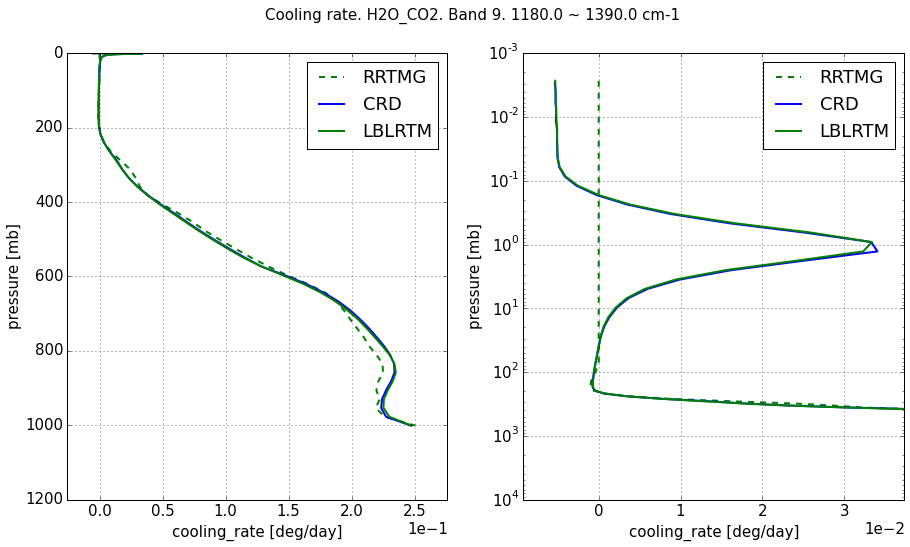


------------------------------------------------------------------------

RRTMG-LW. Spectral band 10. 1390.0 ~ 1480.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -2.4808     0.0000   -2.4808      -0.00000
30   299.70000  -2.7200     0.4662   -2.2538       0.02661
0   1013.00000  -8.8986     8.8866   -0.0120       0.00512

CRD
       pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.002417 -2.528982   0.000000 -2.528982      0.000000
30   299.800000 -2.762545   0.447686 -2.314859      0.027786
0   1013.000000 -8.906562   8.890356 -0.016206      0.005849

LBLRTM
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -2.542891   0.000000 -2.542891      0.000000
30   299.8000 -2.778174   0.450207 -2.327967      0.026118
0   1013.0000 -8.898490   8.879338 -0.019151      0.004226

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.048182   0.000000  0.048182     -0.000000
30 -0.10000

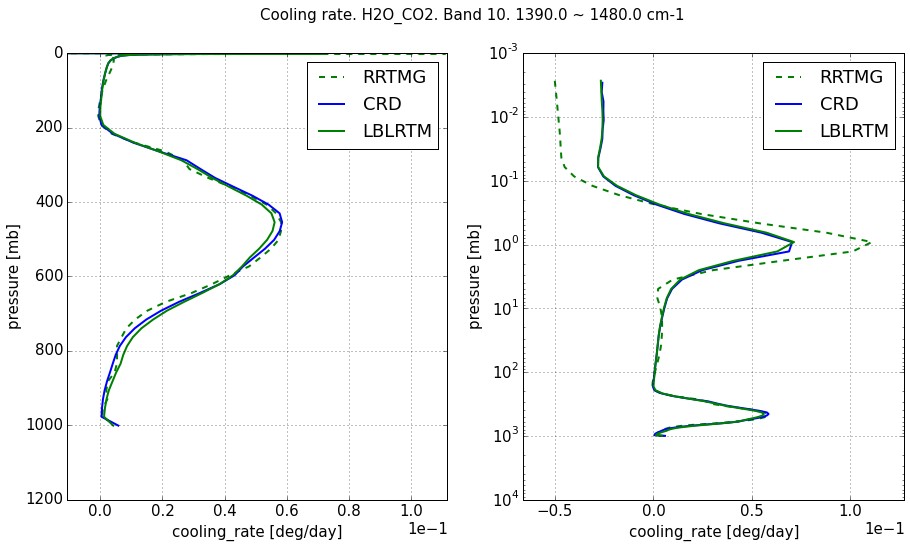


------------------------------------------------------------------------

RRTMG-LW. Spectral band 11. 1480.0 ~ 1800.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -3.2226     0.0000   -3.2226      -0.00000
30   299.70000  -3.8991     1.2651   -2.6340       0.06488
0   1013.00000 -17.8828    17.8685   -0.0143       0.00607

CRD
       pressure    flux_up  flux_down  net_flux  cooling_rate
70     0.002417  -3.353829   0.000000 -3.353829      0.000000
30   299.800000  -3.996974   1.237523 -2.759451      0.071399
0   1013.000000 -17.902258  17.865359 -0.036899      0.013083

LBLRTM
     pressure    flux_up  flux_down  net_flux  cooling_rate
70     0.0024  -3.362108   0.000000 -3.362108      0.000000
30   299.8000  -4.019579   1.248878 -2.770701      0.065686
0   1013.0000 -17.882889  17.851415 -0.031474      0.004635

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.131229   0.000000  0.131229     -0.000000
30 

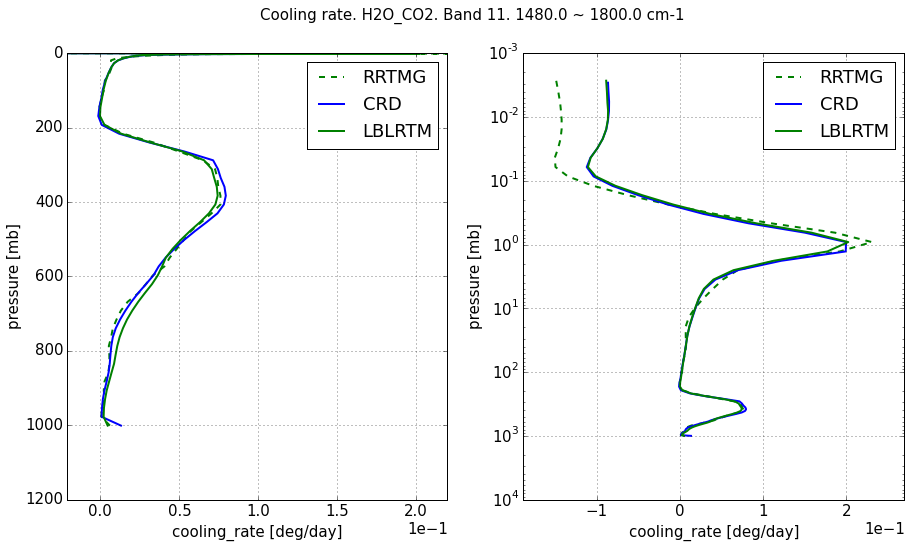


------------------------------------------------------------------------

RRTMG-LW. Spectral band 12. 1800.0 ~ 2080.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -2.6369     0.0000   -2.6369      -0.00000
30   299.70000  -2.7157     0.0684   -2.6473      -0.00002
0   1013.00000  -5.9578     5.3168   -0.6410       0.04224

CRD
       pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.002417 -2.696757   0.000000 -2.696757      0.000000
30   299.800000 -2.775136   0.061014 -2.714122      0.000076
0   1013.000000 -5.965987   5.313618 -0.652369      0.038786

LBLRTM
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -2.669900   0.000000 -2.669900      0.000000
30   299.8000 -2.748818   0.061618 -2.687199      0.000050
0   1013.0000 -5.957771   5.237331 -0.720440      0.018744

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.059857   0.000000  0.059857     -0.000000
30 -0.10000

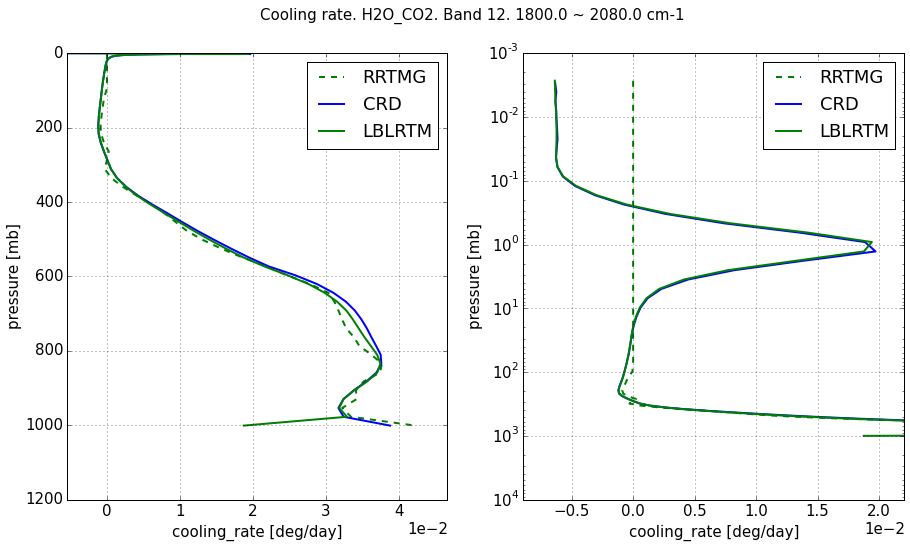


------------------------------------------------------------------------

RRTMG-LW. Spectral band 13. 2080.0 ~ 2250.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -1.1560     0.0000   -1.1560      -0.00000
30   299.70000  -1.2232     0.0116   -1.2116      -0.00238
0   1013.00000  -1.6390     0.6505   -0.9885       0.01436

CRD
       pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.002417 -1.436399   0.000000 -1.436399      0.000000
30   299.800000 -1.447322   0.001156 -1.446166     -0.000439
0   1013.000000 -1.641655   0.478265 -1.163390      0.013815

LBLRTM
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -1.322278   0.000000 -1.322278      0.000000
30   299.8000 -1.343185   0.004052 -1.339133     -0.000832
0   1013.0000 -1.639014   0.600577 -1.038438      0.014676

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.280399   0.000000  0.280399     -0.000000
30 -0.10000

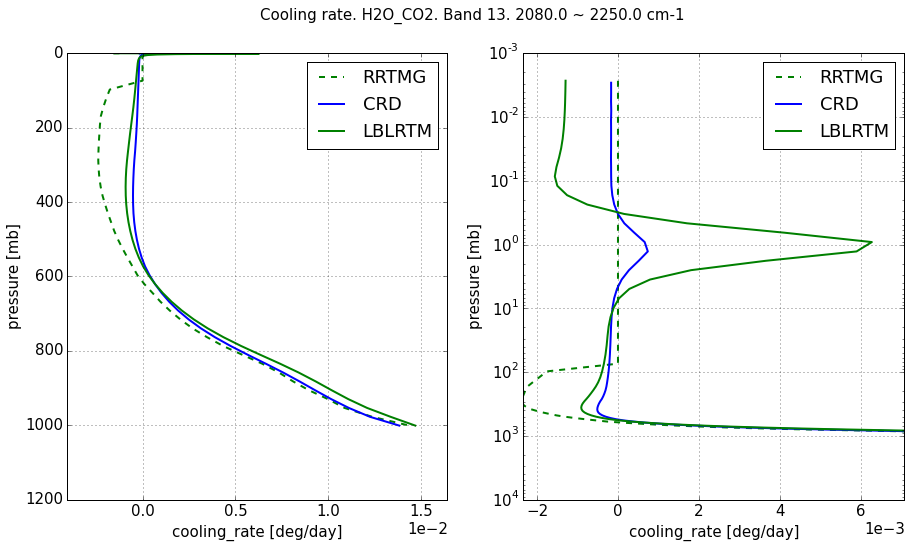


------------------------------------------------------------------------

RRTMG-LW. Spectral band 14. 2250.0 ~ 2380.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -0.0762     0.0000   -0.0762      -0.00000
30   299.70000  -0.0517     0.0513   -0.0004      -0.00001
0   1013.00000  -0.7316     0.7314   -0.0002       0.00008

CRD
       pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.002417 -0.228855   0.000000 -0.228855      0.000000
30   299.800000 -0.220079   0.034873 -0.185206     -0.000206
0   1013.000000 -0.732844   0.572768 -0.160076      0.002017

LBLRTM
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -0.060052   0.000000 -0.060052      0.000000
30   299.8000 -0.061759   0.045020 -0.016739     -0.000337
0   1013.0000 -0.731556   0.724778 -0.006778      0.001245

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.152655   0.000000  0.152655     -0.000000
30 -0.10000

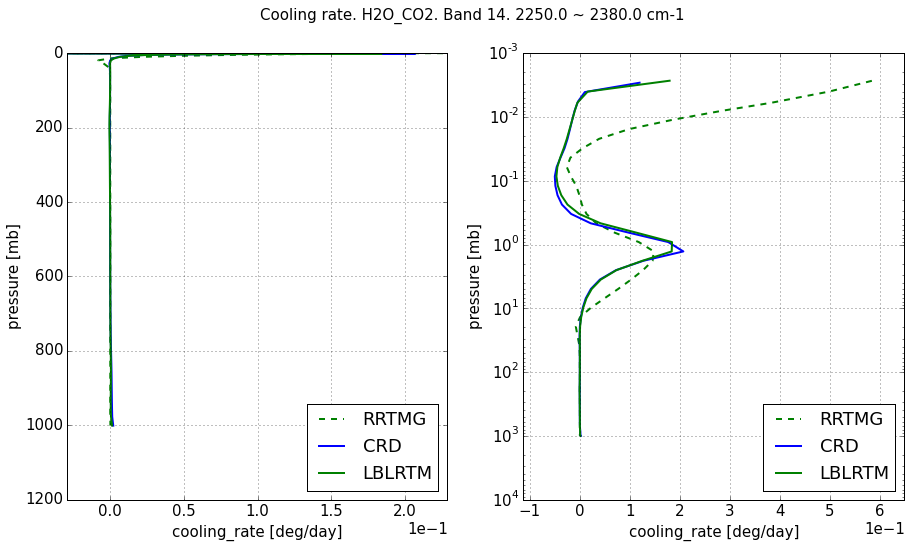


------------------------------------------------------------------------

RRTMG-LW. Spectral band 15. 2380.0 ~ 2600.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -0.4966     0.0000   -0.4966      -0.00000
30   299.70000  -0.5201     0.0037   -0.5164      -0.00107
0   1013.00000  -0.6658     0.1683   -0.4975       0.00318

CRD
       pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.002417 -0.595030   0.000000 -0.595030      0.000000
30   299.800000 -0.600106   0.002205 -0.597902     -0.000173
0   1013.000000 -0.667119   0.083955 -0.583164      0.001097

LBLRTM
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -0.646175   0.000000 -0.646175      0.000000
30   299.8000 -0.642395   0.001199 -0.641196      0.000225
0   1013.0000 -0.665840   0.033077 -0.632763     -0.000042

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.098430   0.000000  0.098430     -0.000000
30 -0.10000

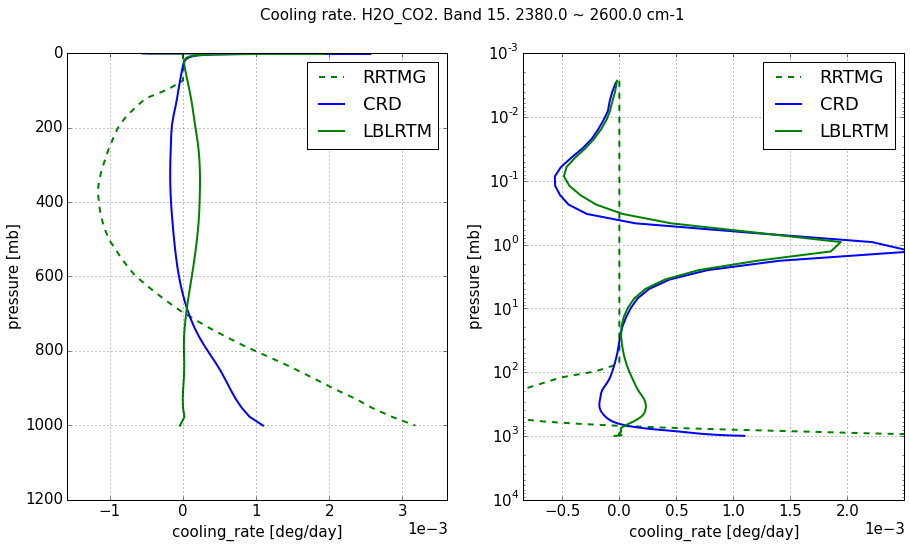


------------------------------------------------------------------------

RRTMG-LW. Spectral band 16. 2600.0 ~ 3250.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -0.3668     0.0000   -0.3668      -0.00000
30   299.70000  -0.3679     0.0002   -0.3677      -0.00013
0   1013.00000  -0.4713     0.1516   -0.3197       0.00297

CRD
       pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.002417 -0.367404   0.000000 -0.367404      0.000000
30   299.800000 -0.367797   0.000024 -0.367773     -0.000039
0   1013.000000 -0.404431   0.076238 -0.328193      0.002539

LBLRTM
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -0.365735   0.000000 -0.365735      0.000000
30   299.8000 -0.366130   0.000023 -0.366107     -0.000038
0   1013.0000 -0.403547   0.075580 -0.327967      0.002114

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.000604   0.000000  0.000604     -0.000000
30 -0.10000

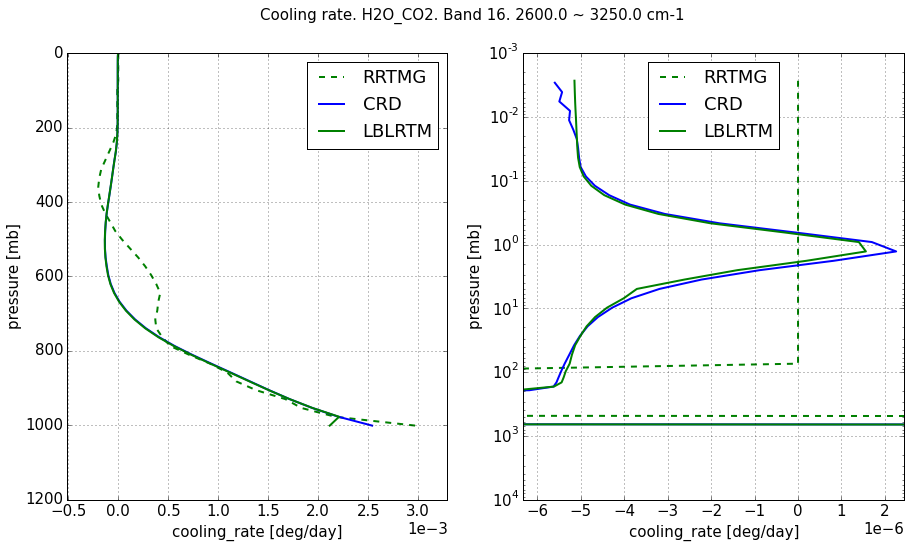


------------------------------------------------------------------------



In [20]:
print('Flux tables and cooling rates in RRTMG spectral bands')
print()
print()

scripts_intermodel.lw_results_by_rrtmg_bands(
    infos_rrtmg=[('RRTMG', 'g', '--', pnl_rrtmg)],
    infos_lbl=[('CRD', 'b', '-', pnl_crd), 
               ('LBLRTM', 'g', '-', pnl_lblrtm)],
    name_molecule=name_molecule)

In [21]:
html_download = ('<a href="./longwave_mls_{name_molecule}'
                 '_by_rrtmg_bands.xlsx"'
                 'download>longwave_mls_{name_molecule}'
                 '_by_rrtmg_bands.xlsx</a>')

display.HTML(html_download.format(name_molecule=name_molecule))

# In CLIRAD's wavenumber bands

Flux tables and cooling rates in CLIRAD spectral bands


CLIRAD-LW Spectral band 1. 0 ~ 340 cm-1

CLIRAD
       pressure   flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -34.03330   0.001232 -34.032068      6.148719
30   299.800000 -36.40643  21.663380 -14.743050      1.350754
0   1013.000000 -51.09213  51.070570  -0.021560      0.007725

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -34.310935   0.000000 -34.310935      0.000000
30   299.800000 -36.441826  21.391389 -15.050437      1.376942
0   1013.000000 -51.093040  51.071508  -0.021532      0.007733

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -34.414211   0.000000 -34.414211      0.000000
30   299.8000 -36.581593  21.327243 -15.254350      1.271036
0   1013.0000 -51.100657  51.173323   0.072666      0.029632

CLIRAD - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70         0  0.277635   0.001232  0.278867      6.148719
30      

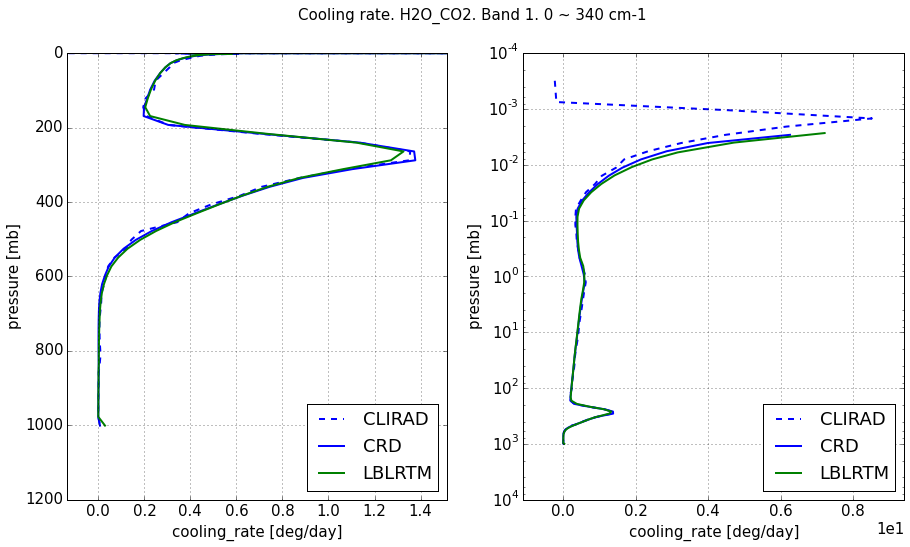


------------------------------------------------------------------------

CLIRAD-LW Spectral band 2. 340 ~ 540 cm-1

CLIRAD
       pressure   flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -59.82235   0.000003 -59.822347     -0.097136
30   299.800000 -60.99290   6.915163 -54.077737      0.649110
0   1013.000000 -82.31579  81.543440  -0.772350      0.156217

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -60.528548   0.000000 -60.528548      0.000000
30   299.800000 -61.592658   6.658546 -54.934111      0.644337
0   1013.000000 -82.315835  81.336060  -0.979775      0.130558

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -60.315923   0.000000 -60.315923      0.000000
30   299.8000 -61.416337   6.875528 -54.540809      0.627878
0   1013.0000 -82.315849  81.379649  -0.936199      0.138696

CLIRAD - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70         0  0.706198   0.000003  0.706201   

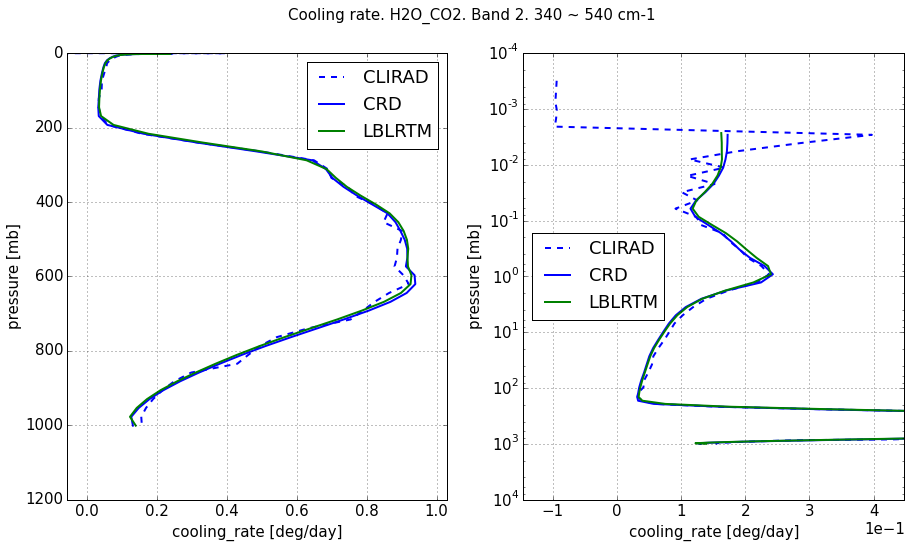


------------------------------------------------------------------------

CLIRAD-LW Spectral band 3. 540 ~ 800 cm-1

CLIRAD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417  -68.96323   0.012381 -68.950849     19.811190
30   299.800000  -74.97459  21.326890 -53.647700      0.216908
0   1013.000000 -112.81600  98.637690 -14.178310      0.521221

CRD
       pressure     flux_up  flux_down   net_flux  cooling_rate
70     0.002417  -68.646451   0.000000 -68.646451      0.000000
30   299.800000  -74.846726  21.737563 -53.109162      0.234086
0   1013.000000 -112.837813  98.763525 -14.074288      0.429695

LBLRTM
     pressure     flux_up  flux_down   net_flux  cooling_rate
70     0.0024  -68.706526   0.000000 -68.706526      0.000000
30   299.8000  -75.092107  21.565922 -53.526185      0.224961
0   1013.0000 -112.816764  98.440653 -14.376111      0.433820

CLIRAD - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70         0 -0.316779   0.012381 

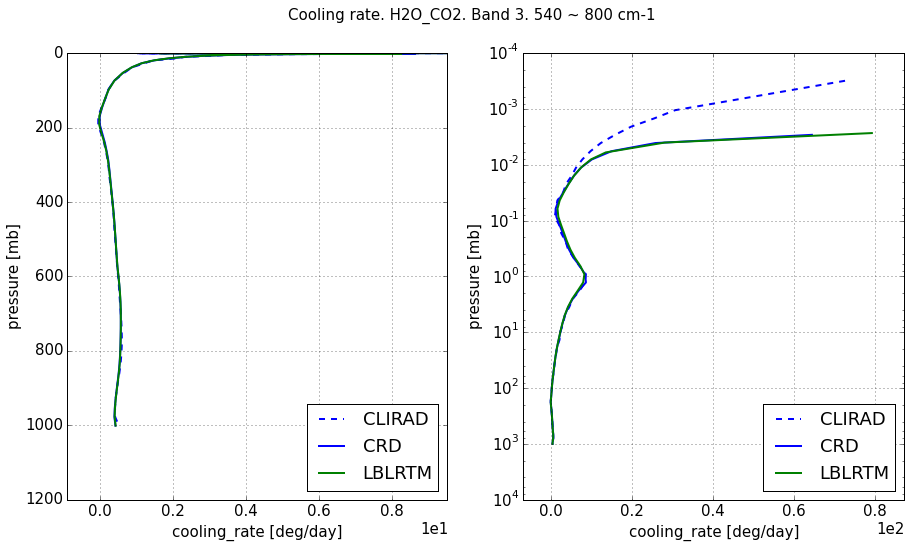


------------------------------------------------------------------------

CLIRAD-LW Spectral band 4. 800 ~ 980 cm-1

CLIRAD
       pressure   flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -59.98326  4.420017e-08 -59.983260     -0.000433
30   299.800000 -60.03240  2.851227e-02 -60.003888     -0.001018
0   1013.000000 -61.64931  9.531820e+00 -52.117490      0.258610

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -60.138326   0.000000 -60.138326      0.000000
30   299.800000 -60.216994   0.040386 -60.176607     -0.001240
0   1013.000000 -61.681243   8.624879 -53.056364      0.237852

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -60.121864   0.000000 -60.121864      0.000000
30   299.8000 -60.198463   0.037885 -60.160579     -0.001276
0   1013.0000 -61.657526   8.524920 -53.132606      0.225768

CLIRAD - CRD
    pressure   flux_up     flux_down  net_flux  cooling_rate
70         0  0.155066  4.42001

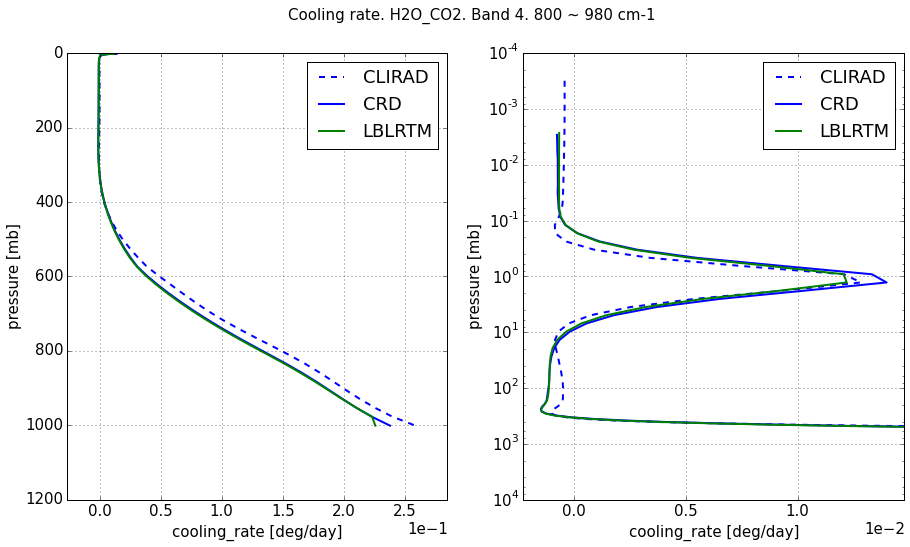


------------------------------------------------------------------------

CLIRAD-LW Spectral band 5. 980 ~ 1100 cm-1

CLIRAD
       pressure   flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -30.44897  4.965726e-07 -30.448970     -0.000884
30   299.800000 -30.51914  2.932311e-02 -30.489817     -0.001695
0   1013.000000 -31.34389  3.985245e+00 -27.358645      0.112096

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -30.504253   0.000000 -30.504253      0.000000
30   299.800000 -30.582386   0.030529 -30.551857     -0.001934
0   1013.000000 -31.354231   3.583960 -27.770271      0.102604

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -30.491855   0.000000 -30.491855      0.000000
30   299.8000 -30.569473   0.029239 -30.540235     -0.001928
0   1013.0000 -31.337711   3.550774 -27.786937      0.097630

CLIRAD - CRD
    pressure   flux_up     flux_down  net_flux  cooling_rate
70         0  0.055283  4.9657

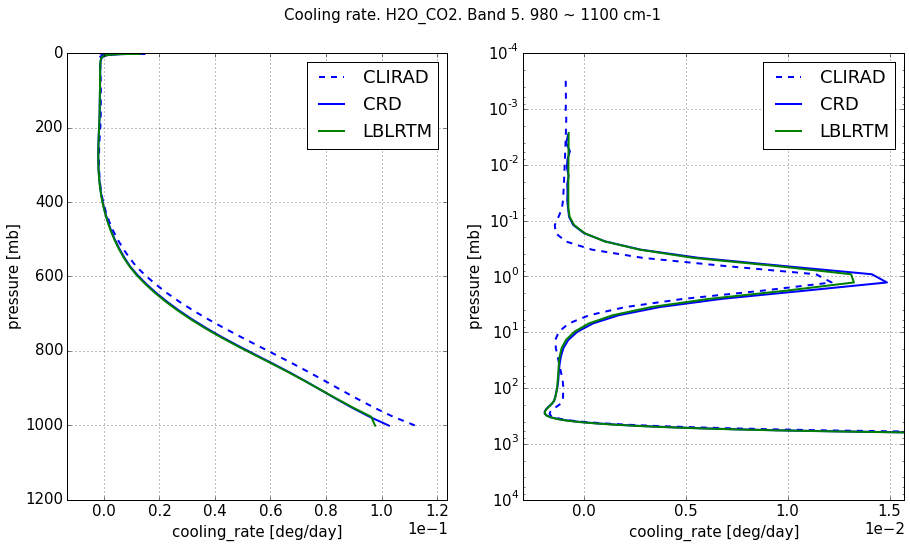


------------------------------------------------------------------------

CLIRAD-LW Spectral band 6. 1100 ~ 1215 cm-1

CLIRAD
       pressure   flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -21.79535  2.657388e-13 -21.795350 -3.024772e-09
30   299.800000 -21.80484  8.713370e-03 -21.796127  9.956238e-05
0   1013.000000 -23.27341  6.326471e+00 -16.946939  1.579750e-01

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -21.772813   0.000000 -21.772813      0.000000
30   299.800000 -21.785274   0.012782 -21.772491      0.000305
0   1013.000000 -23.269652   6.306189 -16.963463      0.160483

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -21.757502   0.000000 -21.757502      0.000000
30   299.8000 -21.770095   0.012590 -21.757505      0.000265
0   1013.0000 -23.254791   6.299774 -16.955017      0.156423

CLIRAD - CRD
    pressure   flux_up     flux_down  net_flux  cooling_rate
70         0 -0.022537  2.657

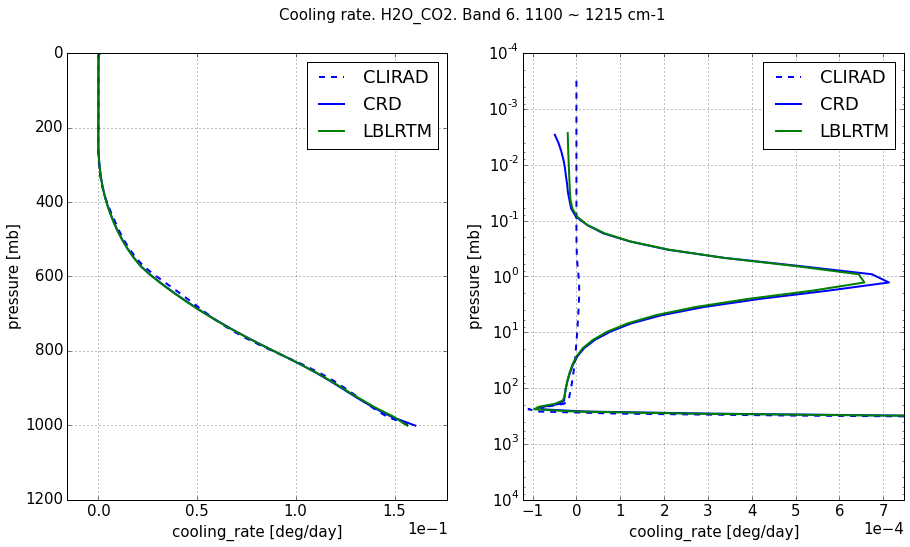


------------------------------------------------------------------------

CLIRAD-LW Spectral band 7. 1215 ~ 1380 cm-1

CLIRAD
       pressure   flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -16.32561  4.906120e-10 -16.325610 -6.565916e-07
30   299.800000 -16.46534  2.195141e-01 -16.245826  1.407870e-02
0   1013.000000 -23.74060  1.784015e+01  -5.900450  2.084762e-01

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -16.035589   0.000000 -16.035589      0.000000
30   299.800000 -16.184856   0.212737 -15.972118      0.011741
0   1013.000000 -23.755165  18.582951  -5.172214      0.186966

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -16.054611   0.000000 -16.054611      0.000000
30   299.8000 -16.205150   0.213088 -15.992062      0.011235
0   1013.0000 -23.736876  18.486857  -5.250019      0.187462

CLIRAD - CRD
    pressure   flux_up     flux_down  net_flux  cooling_rate
70         0 -0.290021  4.906

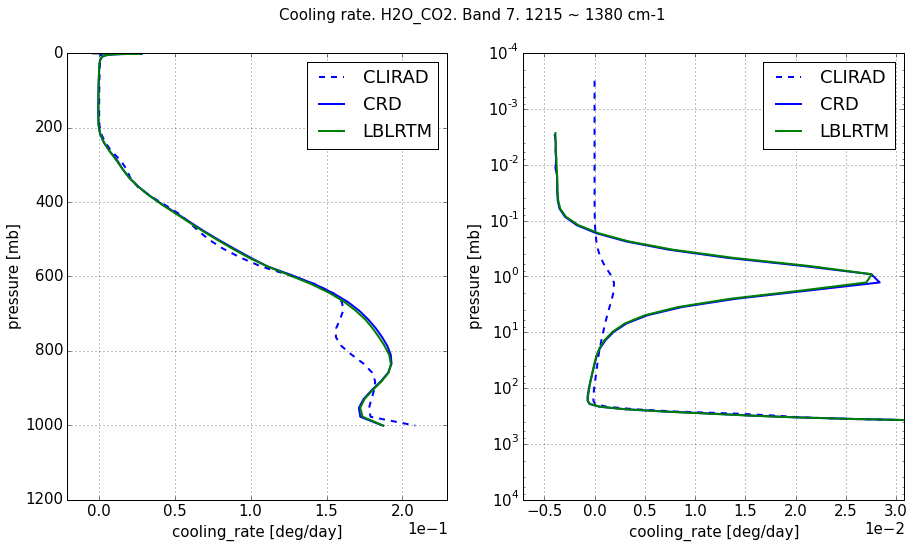


------------------------------------------------------------------------

CLIRAD-LW Spectral band 8. 1380 ~ 1900 cm-1

CLIRAD
       pressure    flux_up  flux_down  net_flux  cooling_rate
70     0.002417  -7.341434   0.000002 -7.341432     -0.165602
30   299.800000  -8.295568   1.769966 -6.525602      0.097178
0   1013.000000 -30.880560  30.708790 -0.171770      0.059902

CRD
       pressure    flux_up  flux_down  net_flux  cooling_rate
70     0.002417  -7.262541   0.000000 -7.262541      0.000000
30   299.800000  -8.190465   1.754848 -6.435618      0.102030
0   1013.000000 -30.729595  30.641071 -0.088524      0.027165

LBLRTM
     pressure    flux_up  flux_down  net_flux  cooling_rate
70     0.0024  -7.301402   0.000000 -7.301402      0.000000
30   299.8000  -8.245419   1.768596 -6.476823      0.094446
0   1013.0000 -30.697533  30.597038 -0.100495      0.019151

CLIRAD - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70         0 -0.078893   0.000002 -0.078891     -0.1

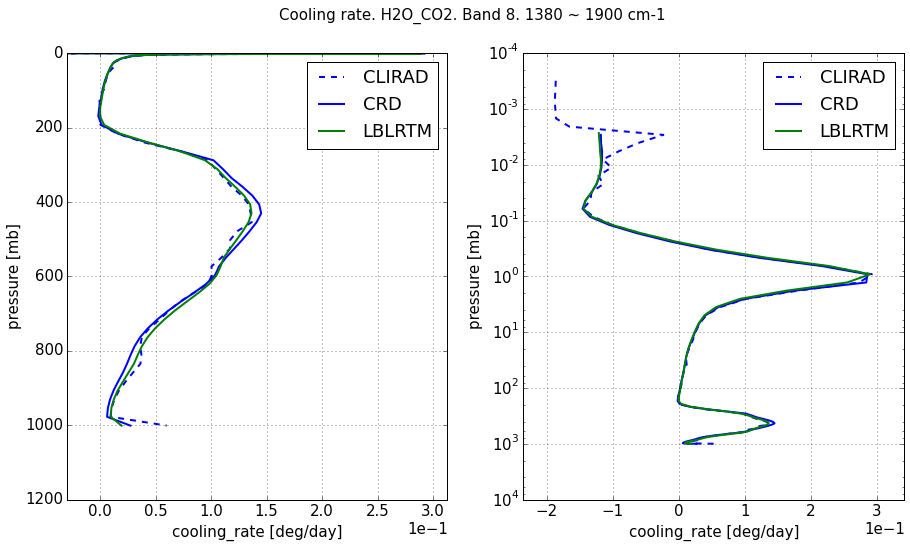


------------------------------------------------------------------------

CLIRAD-LW Spectral band 9. 1900 ~ 3000 cm-1

CLIRAD
       pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.002417 -4.861082   0.000000 -4.861082     -0.000000
30   299.800000 -4.875098   0.012047 -4.863051     -0.000178
0   1013.000000 -6.674498   3.427002 -3.247496      0.060868

CRD
       pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.002417 -4.402004   0.000000 -4.402004      0.000000
30   299.800000 -4.453260   0.056926 -4.396334     -0.001962
0   1013.000000 -6.625445   3.770242 -2.855203      0.051202

LBLRTM
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -4.132859   0.000000 -4.132859      0.000000
30   299.8000 -4.195829   0.068889 -4.126940     -0.002055
0   1013.0000 -6.614782   3.932153 -2.682629      0.028244

CLIRAD - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70         0 -0.459078   0.000000 -0.459078     -0.000000
30    

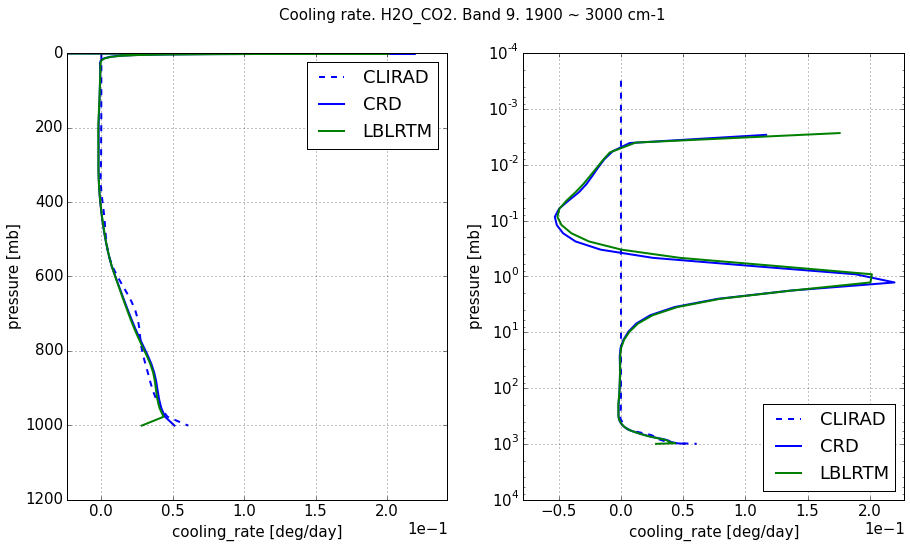


------------------------------------------------------------------------

CLIRAD-LW Spectral band 10. 540 ~ 620 cm-1

CLIRAD
       pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.002417       -0          0         0            -0
30   299.800000       -0          0         0            -0
0   1013.000000       -0          0         0            -0

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -25.557881   0.000000 -25.557881      0.000000
30   299.800000 -26.837053   3.061298 -23.775755      0.103920
0   1013.000000 -36.235420  34.534637  -1.700784      0.164543

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -25.541536   0.000000 -25.541536      0.000000
30   299.8000 -26.832667   3.040885 -23.791781      0.101662
0   1013.0000 -36.231410  34.549568  -1.681842      0.163333

CLIRAD - CRD
    pressure    flux_up  flux_down   net_flux  cooling_rate
70         0  25.557881   0.000000  25.557881     -

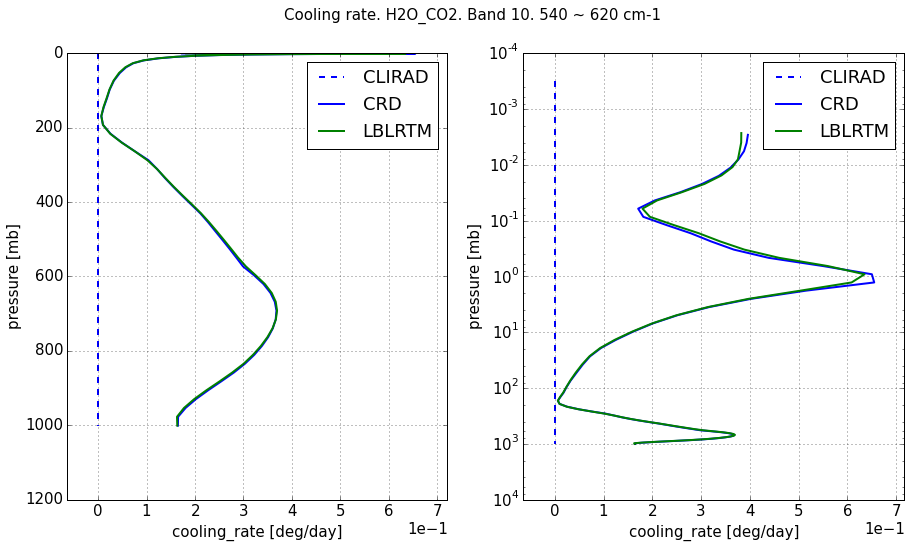


------------------------------------------------------------------------



In [22]:
print('Flux tables and cooling rates in CLIRAD spectral bands')
print()
print()

scripts_intermodel.lw_results_by_cliard_bands(
    infos_clirad=[('CLIRAD', 'b', '--', pnl_clirad)],
    infos_lbl=[('CRD', 'b', '-', pnl_crd),
               ('LBLRTM', 'g', '-', pnl_lblrtm)],
    name_molecule=name_molecule)

In [23]:
html_download = ('<a href="./longwave_mls_{name_molecule}'
                 '_by_clirad_bands.xlsx"'
                 'download>longwave_mls_{name_molecule}'
                 '_by_clirad_bands.xlsx</a>')

display.HTML(html_download.format(name_molecule=name_molecule))

In [24]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')